In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Top-10 retriever accuracy evaluation

## NQ Dataset

In [2]:
new_file_path_v5 = 'NQ-evaluation.xlsx'
new_data_v5 = pd.read_excel(new_file_path_v5)
new_data_v5.head()

,Query Types,BM25 + Match Query,BM25 + Bool Prefix Query,BM25 + Most Field Query,BM25 + Cross Field Query,BM25 + Best Field Query,KNN+Match Query,KNN + Phrase Prefix Query,KNN + Bool Prefix Query,KNN + Most Field Query,KNN + Cross Field Query,KNN + Best Field Query,Sparse EncodeR+Match Query,Sparse EncodeR + Phrase Prefix Query,Sparse EncodeR+Bool Prefix Query,Sparse EncodeR + Most Feld Query,Sparse EncodeR + Cross Field Query,Sparse EncodeR + Best Field Query
0,NQDataset Top-10 retrieval accuracy,36.7,84.17,87.45,82.63,86.26,88.46,88.46,86.13,87.45,88.46,88.66,88.55,88.33,88.55,88.55,88.55,88.77


/var/folders/zr/ppg2z38s3j13446362bq9k_00000gn/T/ipykernel_78120/3179645966.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_df['Query Type'], rotation=90)


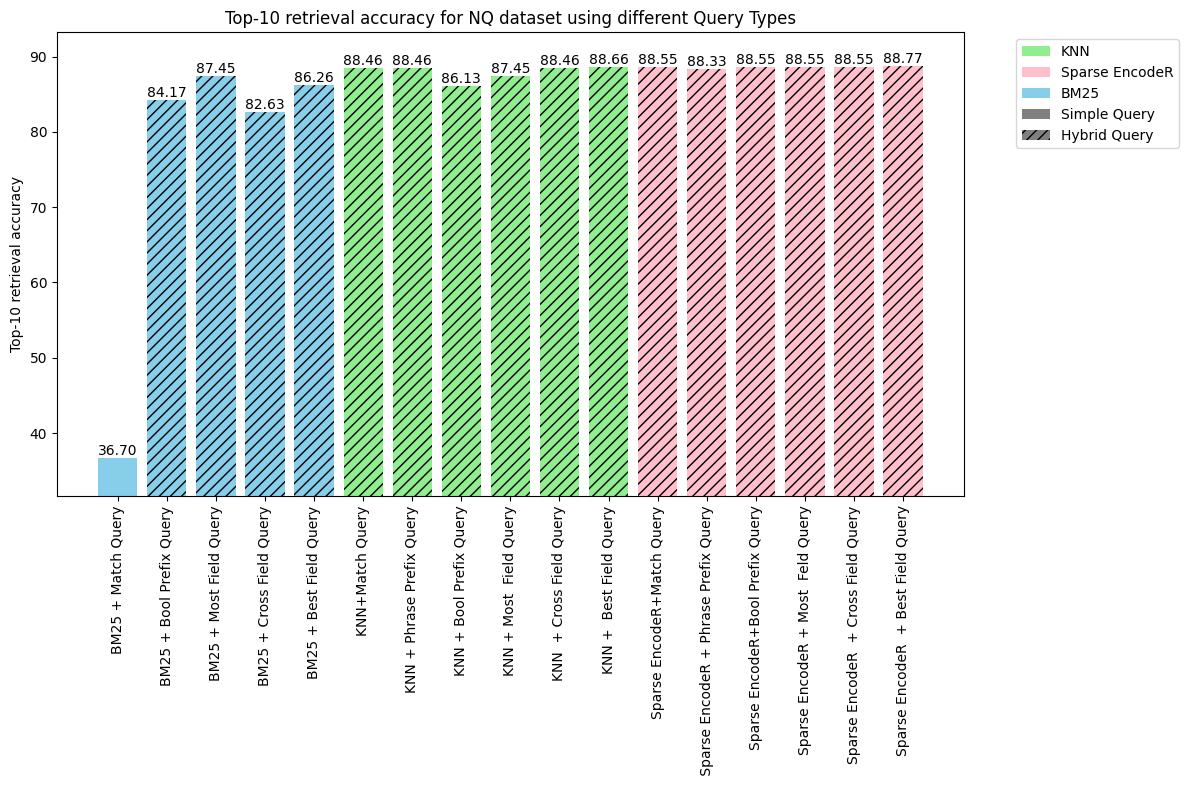

In [3]:
# Setting up color and pattern mapping for the visualization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}  # Empty pattern for simple, slashes for hybrid

# Prepare data with categorization for main type and query complexity (simple vs hybrid)
bar_data = {
    'Query Type': [],
    'Score': [],
    'Color': [],
    'Pattern': []
}

for query_type, score in new_data_v5.iloc[0, 1:].items():
    # main_type = 'BM25' if 'BM25' in query_type else ('KNN' if 'KNN' in query_type else 'Sparse EncodeR')
    main_type = 'KNN' if 'KNN' in query_type else ('Sparse EncodeR' if 'Sparse EncodeR' in query_type else 'BM25')
    complexity = 'Simple' if query_type.strip() == 'BM25 + Match Query' else 'Hybrid'
    bar_data['Query Type'].append(query_type)
    bar_data['Score'].append(score)
    bar_data['Color'].append(colors[main_type])
    bar_data['Pattern'].append(patterns[complexity])

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(bar_data)

# Adjusting the y-axis to start just below the minimum value in the chart (36.7)
y_min = min(bar_df['Score']) - 5  # Setting y-axis minimum to 5 less than the minimum score for better visibility

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(bar_df['Query Type'], bar_df['Score'], color=bar_df['Color'])

# Adding patterns and annotations to bars
for bar, pattern, score in zip(bars, bar_df['Pattern'], bar_df['Score']):
    bar.set_hatch(pattern)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
            ha='center', va='bottom')
    
# Customizing the plot
ax.set_ylim(bottom=y_min)  # Adjusting y-axis minimum
ax.set_xticklabels(bar_df['Query Type'], rotation=90)
ax.set_ylabel('Top-10 retrieval accuracy')
ax.set_title('Top-10 retrieval accuracy for NQ dataset using different Query Types')

# Legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(facecolor=colors['KNN'], label='KNN'),
    mpatches.Patch(facecolor=colors['Sparse EncodeR'], label='Sparse EncodeR'),
    mpatches.Patch(facecolor=colors['BM25'], label='BM25'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Simple'], label='Simple Query'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Hybrid'], label='Hybrid Query'),
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## TREC Covid Evaluation 1

/var/folders/zr/ppg2z38s3j13446362bq9k_00000gn/T/ipykernel_78120/1662684604.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_df['Query Type'], rotation=90)


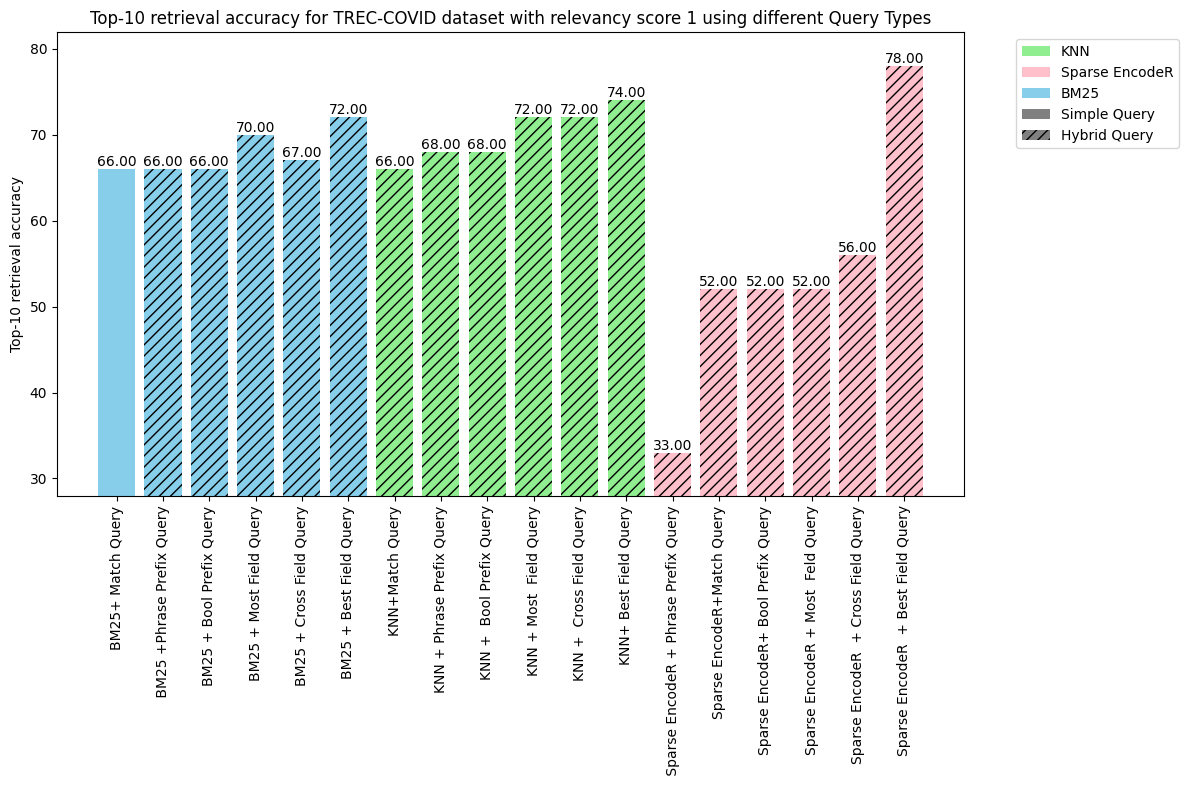

In [4]:
trec_covid_path = 'TREC-COVID-evaluation-1.xlsx'
trec_covid = pd.read_excel(trec_covid_path)


# Setting up color and pattern mapping for the visualization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}  # Empty pattern for simple, slashes for hybrid

# Prepare data with categorization for main type and query complexity (simple vs hybrid)
bar_data = {
    'Query Type': [],
    'Score': [],
    'Color': [],
    'Pattern': []
}

for query_type, score in trec_covid.iloc[0, 1:].items():
    # main_type = 'BM25' if 'BM25' in query_type else ('KNN' if 'KNN' in query_type else 'Sparse EncodeR')
    main_type = 'KNN' if 'KNN' in query_type else ('Sparse EncodeR' if 'Sparse EncodeR' in query_type else 'BM25')
    complexity = 'Simple' if query_type.strip() == 'BM25+ Match Query' else 'Hybrid'
    bar_data['Query Type'].append(query_type)
    bar_data['Score'].append(score)
    bar_data['Color'].append(colors[main_type])
    bar_data['Pattern'].append(patterns[complexity])

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(bar_data)

# Adjusting the y-axis to start just below the minimum value in the chart (36.7)
y_min = min(bar_df['Score']) - 5  # Setting y-axis minimum to 5 less than the minimum score for better visibility

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(bar_df['Query Type'], bar_df['Score'], color=bar_df['Color'])

# Adding patterns and annotations to bars
for bar, pattern, score in zip(bars, bar_df['Pattern'], bar_df['Score']):
    bar.set_hatch(pattern)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
            ha='center', va='bottom')



# Customizing the plot
ax.set_ylim(bottom=y_min)  # Adjusting y-axis minimum
ax.set_xticklabels(bar_df['Query Type'], rotation=90)
ax.set_ylabel('Top-10 retrieval accuracy')
ax.set_title('Top-10 retrieval accuracy for TREC-COVID dataset with relevancy score 1 using different Query Types')

# Legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(facecolor=colors['KNN'], label='KNN'),
    mpatches.Patch(facecolor=colors['Sparse EncodeR'], label='Sparse EncodeR'),
    mpatches.Patch(facecolor=colors['BM25'], label='BM25'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Simple'], label='Simple Query'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Hybrid'], label='Hybrid Query'),
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## TREC Covid Evaluation 2

/var/folders/zr/ppg2z38s3j13446362bq9k_00000gn/T/ipykernel_78120/1927776363.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_df['Query Type'], rotation=90)


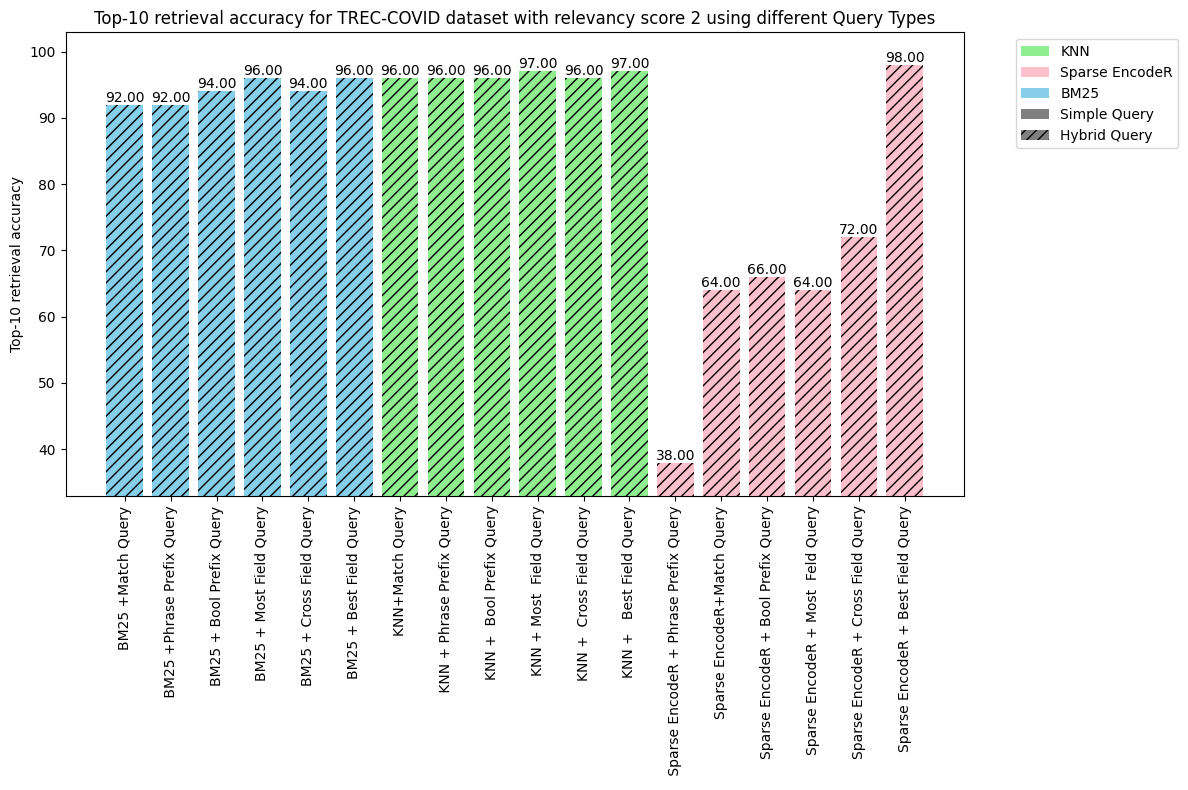

In [5]:
trec_covid_path2 = 'TREC-COVID-evaluation2.xlsx'
trec_covid2 = pd.read_excel(trec_covid_path2)


# Setting up color and pattern mapping for the visualization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}  # Empty pattern for simple, slashes for hybrid

# Prepare data with categorization for main type and query complexity (simple vs hybrid)
bar_data = {
    'Query Type': [],
    'Score': [],
    'Color': [],
    'Pattern': []
}

for query_type, score in trec_covid2.iloc[0, 1:].items():
    # main_type = 'BM25' if 'BM25' in query_type else ('KNN' if 'KNN' in query_type else 'Sparse EncodeR')
    main_type = 'KNN' if 'KNN' in query_type else ('Sparse EncodeR' if 'Sparse EncodeR' in query_type else 'BM25')
    complexity = 'Simple' if query_type.strip() == 'BM25+ Match Query' else 'Hybrid'
    bar_data['Query Type'].append(query_type)
    bar_data['Score'].append(score)
    bar_data['Color'].append(colors[main_type])
    bar_data['Pattern'].append(patterns[complexity])

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(bar_data)

# Adjusting the y-axis to start just below the minimum value in the chart (36.7)
y_min = min(bar_df['Score']) - 5  # Setting y-axis minimum to 5 less than the minimum score for better visibility

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(bar_df['Query Type'], bar_df['Score'], color=bar_df['Color'])

# Adding patterns and annotations to bars
for bar, pattern, score in zip(bars, bar_df['Pattern'], bar_df['Score']):
    bar.set_hatch(pattern)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
            ha='center', va='bottom')


# Customizing the plot
ax.set_ylim(bottom=y_min)  # Adjusting y-axis minimum
ax.set_xticklabels(bar_df['Query Type'], rotation=90)
ax.set_ylabel('Top-10 retrieval accuracy')
ax.set_title('Top-10 retrieval accuracy for TREC-COVID dataset with relevancy score 2 using different Query Types')

# Legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(facecolor=colors['KNN'], label='KNN'),
    mpatches.Patch(facecolor=colors['Sparse EncodeR'], label='Sparse EncodeR'),
    mpatches.Patch(facecolor=colors['BM25'], label='BM25'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Simple'], label='Simple Query'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Hybrid'], label='Hybrid Query'),
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## HotPotQA eval

/var/folders/zr/ppg2z38s3j13446362bq9k_00000gn/T/ipykernel_78120/2609079326.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_df['Query Type'], rotation=90)


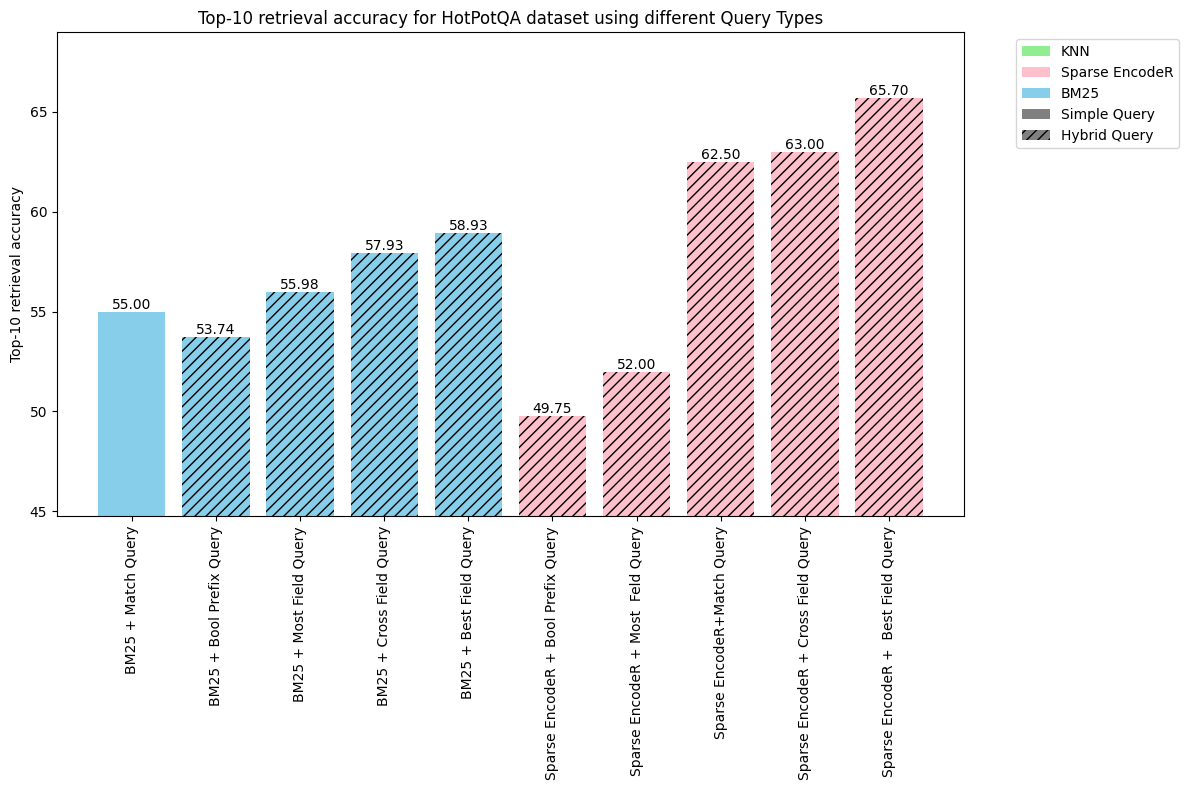

In [6]:
hotpotqa_path = 'HotPotQA-evaluation.xlsx'
hotpotqa = pd.read_excel(hotpotqa_path)


# Setting up color and pattern mapping for the visualization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}  # Empty pattern for simple, slashes for hybrid

# Prepare data with categorization for main type and query complexity (simple vs hybrid)
bar_data = {
    'Query Type': [],
    'Score': [],
    'Color': [],
    'Pattern': []
}

for query_type, score in hotpotqa.iloc[0, 1:].items():
    # main_type = 'BM25' if 'BM25' in query_type else ('KNN' if 'KNN' in query_type else 'Sparse EncodeR')
    main_type = 'KNN' if 'KNN' in query_type else ('Sparse EncodeR' if 'Sparse EncodeR' in query_type else 'BM25')
    complexity = 'Simple' if query_type.strip() == 'BM25 + Match Query' else 'Hybrid'
    bar_data['Query Type'].append(query_type)
    bar_data['Score'].append(score)
    bar_data['Color'].append(colors[main_type])
    bar_data['Pattern'].append(patterns[complexity])

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(bar_data)

# Adjusting the y-axis to start just below the minimum value in the chart (36.7)
y_min = min(bar_df['Score']) - 5  # Setting y-axis minimum to 5 less than the minimum score for better visibility

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(bar_df['Query Type'], bar_df['Score'], color=bar_df['Color'])

# Adding patterns and annotations to bars
for bar, pattern, score in zip(bars, bar_df['Pattern'], bar_df['Score']):
    bar.set_hatch(pattern)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', 
            ha='center', va='bottom')


# Customizing the plot
ax.set_ylim(bottom=y_min)  # Adjusting y-axis minimum
ax.set_xticklabels(bar_df['Query Type'], rotation=90)
ax.set_ylabel('Top-10 retrieval accuracy')
ax.set_title('Top-10 retrieval accuracy for HotPotQA dataset using different Query Types')

# Legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(facecolor=colors['KNN'], label='KNN'),
    mpatches.Patch(facecolor=colors['Sparse EncodeR'], label='Sparse EncodeR'),
    mpatches.Patch(facecolor=colors['BM25'], label='BM25'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Simple'], label='Simple Query'),
    mpatches.Patch(facecolor='grey', hatch=patterns['Hybrid'], label='Hybrid Query'),
]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# NDCG@10 evaluation

## NQ dataset

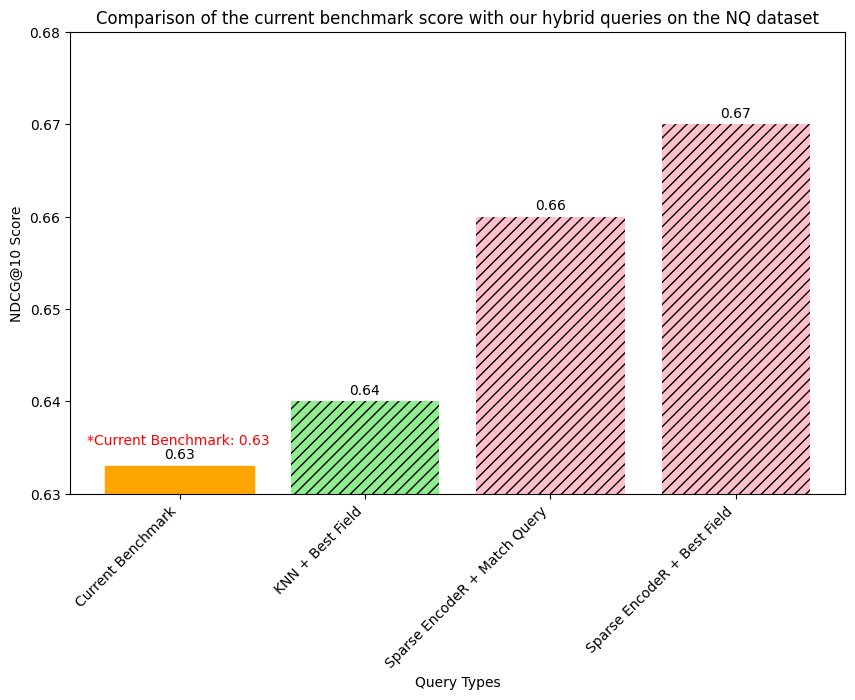

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the 'NDCG@10' sheet
nq_dataset = pd.read_excel('NQ-evaluation.xlsx', sheet_name='NDCG@10')

# Determine the benchmark index and score
benchmark_index = nq_dataset.columns.tolist().index('Current Benchmark')
benchmark_score = nq_dataset.iloc[0, benchmark_index]

# Prepare the data for plotting
methods = nq_dataset.columns[1:]  # Excluding the 'Query Types' column for plotting
scores = nq_dataset.iloc[0, 1:].values

# Define colors and patterns for bar customization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Iterate over each method to plot bars with specific colors and patterns
for i, (method, score) in enumerate(zip(methods, scores)):
    # Determine main type and complexity for the current method
    main_type = 'KNN' if 'KNN' in method else ('Sparse EncodeR' if 'Sparse EncodeR' in method else 'BM25')
    complexity = 'Simple' if method.strip() == 'BM25 + Match Query' else 'Hybrid'
    
    # Plotting the bar with specified color and pattern
    bar = ax1.bar(i, score, color=colors[main_type], hatch=patterns[complexity], label='NDCG@10 Scores' if i == 0 else "")

    # Highlight the current benchmark bar
    if i == benchmark_index - 1:
        bar[0].set_color('orange')  # Highlighting the benchmark bar
        bar[0].set_label('*Current Benchmark')
        bar[0].set_hatch('')  # No pattern for benchmark for distinction

    # Display numbers on the bars by annotating each bar with its score
    ax1.annotate(f'{score:.2f}',  # Format the score to two decimal places
                 xy=(i, score),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Customize the plot as before
ax1.set_ylim([0.63, max(scores) + 0.01])
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_xlabel('Query Types')
ax1.set_ylabel('NDCG@10 Score')
ax1.set_title('Comparison of the current benchmark score with our hybrid queries on the NQ dataset')

# Adjust the annotation for the benchmark score
ax1.text(benchmark_index - 1.5, benchmark_score + 0.002, f'*Current Benchmark: {benchmark_score:.2f}', color='red', va='bottom')

plt.show()


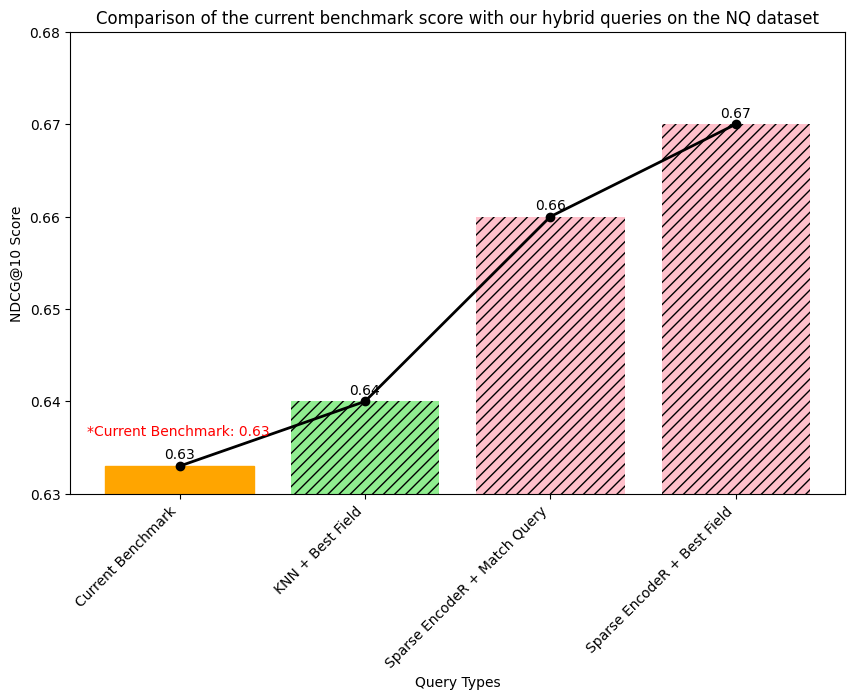

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the 'NDCG@10' sheet
nq_dataset = pd.read_excel('NQ-evaluation.xlsx', sheet_name='NDCG@10')

# Determine the benchmark index and score
benchmark_index = nq_dataset.columns.tolist().index('Current Benchmark')
benchmark_score = nq_dataset.iloc[0, benchmark_index]

# Prepare the data for plotting
methods = nq_dataset.columns[1:]  # Excluding the 'Query Types' column for plotting
scores = nq_dataset.iloc[0, 1:].values

# Define colors and patterns for bar customization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_centers = []  # List to store the centers of the bars for the line plot

# Iterate over each method to plot bars with specific colors and patterns
for i, (method, score) in enumerate(zip(methods, scores)):
    main_type = 'KNN' if 'KNN' in method else ('Sparse EncodeR' if 'Sparse EncodeR' in method else 'BM25')
    complexity = 'Simple' if method.strip() == 'BM25 + Match Query' else 'Hybrid'

    # Plotting the bar with specified color and pattern
    bar = ax1.bar(i, score, color=colors[main_type], hatch=patterns[complexity], label='NDCG@10 Scores' if i == 0 else "")

    bar_centers.append(i)  # Save the center of each bar

    # Highlight the current benchmark bar
    if i == benchmark_index - 1:
        bar[0].set_color('orange')  # Highlighting the benchmark bar
        bar[0].set_label('*Current Benchmark')
        bar[0].set_hatch('')  # No pattern for benchmark for distinction

    # Display numbers on the bars
    ax1.annotate(f'{score:.2f}',
                 xy=(i, score),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Now draw a line connecting the middle of all the bars
ax1.plot(bar_centers, scores, color='black', marker='o', linestyle='-', linewidth=2)

# Customize the plot
ax1.set_ylim([0.63, max(scores) + 0.01])
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_xlabel('Query Types')
ax1.set_ylabel('NDCG@10 Score')
ax1.set_title('Comparison of the current benchmark score with our hybrid queries on the NQ dataset')

# Adjust the annotation for the benchmark score
ax1.text(benchmark_index - 1.5, benchmark_score + 0.003, f'*Current Benchmark: {benchmark_score:.2f}', color='red', va='bottom')

plt.show()


## TREC-Covid

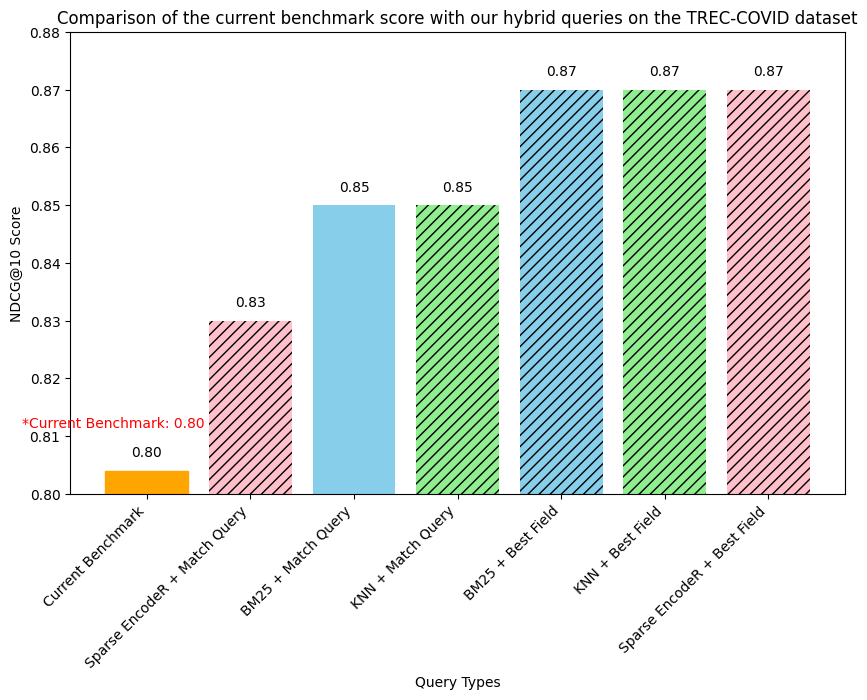

In [9]:
# Read the data from the 'NDCG@10' sheet
trec_covid = pd.read_excel('TREC-COVID-evaluation2.xlsx', sheet_name='NDCG@10')

# Determine the benchmark index and score
benchmark_index = trec_covid.columns.tolist().index('Current Benchmark')
benchmark_score = trec_covid.iloc[0, benchmark_index]

# Prepare the data for plotting
methods = trec_covid.columns[1:]  # Excluding the 'Query Types' column for plotting
scores = trec_covid.iloc[0, 1:].values

# Define colors and patterns for bar customization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Iterate over each method to plot bars with specific colors and patterns
for i, (method, score) in enumerate(zip(methods, scores)):
    # Determine main type and complexity for the current method
    main_type = 'KNN' if 'KNN' in method else ('Sparse EncodeR' if 'Sparse EncodeR' in method else 'BM25')
    complexity = 'Simple' if 'BM25 + Match Query' in method else 'Hybrid'

    # Plotting the bar with specified color and pattern
    bar = ax1.bar(i, score, color=colors[main_type], hatch=patterns[complexity], label='NDCG@10 Scores' if i == 0 else "")

    # Highlight the current benchmark bar
    if i == benchmark_index - 1:
        bar[0].set_color('orange')  # Highlighting the benchmark bar
        bar[0].set_label('*Current Benchmark')
        bar[0].set_hatch('')  # No pattern for benchmark for distinction

    # Annotate each bar with its score value
    ax1.annotate(f'{score:.2f}',  # Format the score to two decimal places
                 (i, score),
                 textcoords="offset points",
                 xytext=(0,10),  # Offset above the bar
                 ha='center')

# Customize the plot as before
ax1.set_ylim([0.8, max(scores) + 0.01])
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_xlabel('Query Types')
ax1.set_ylabel('NDCG@10 Score')
ax1.set_title('Comparison of the current benchmark score with our hybrid queries on the TREC-COVID dataset')

# Adding the benchmark score label
ax1.text(benchmark_index - 2.2, benchmark_score + 0.007, f'*Current Benchmark: {benchmark_score:.2f}', color='red', va='bottom')

plt.show()


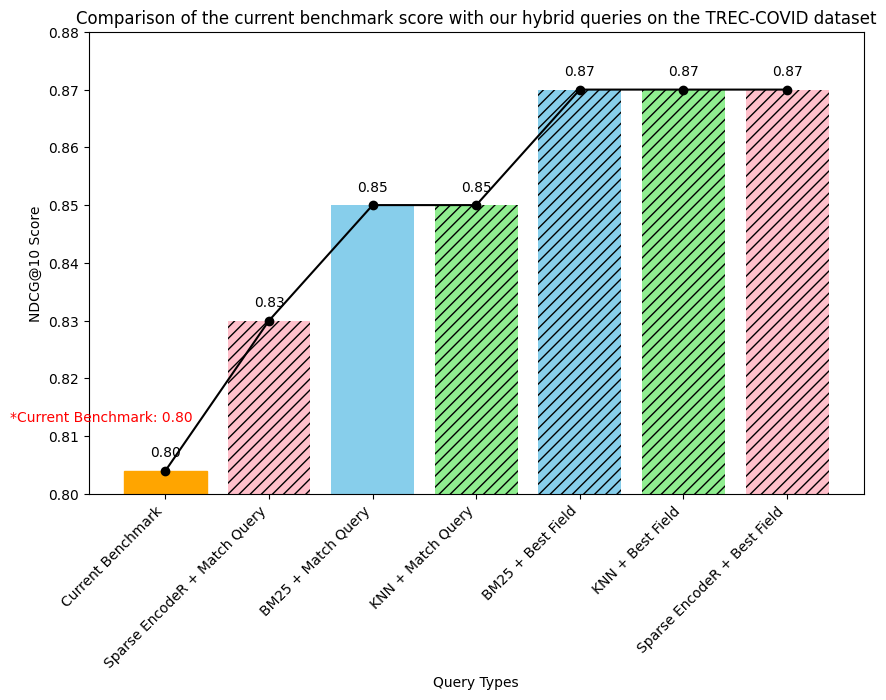

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'trec_covid' DataFrame is correctly loaded with 'methods' and 'scores'

# Define colors and patterns for bar customization
colors = {'BM25': 'skyblue', 'KNN': 'lightgreen', 'Sparse EncodeR': 'pink'}
patterns = {'Simple': '', 'Hybrid': '///'}

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Lists to store the midpoints of the bars (x-coordinates) and scores (y-coordinates) for the line plot
midpoints = []
yscores = []

# Iterate over each method to plot bars with specific colors and patterns
for i, (method, score) in enumerate(zip(methods, scores)):
    # Determine main type and complexity for the current method
    main_type = 'KNN' if 'KNN' in method else ('Sparse EncodeR' if 'Sparse EncodeR' in method else 'BM25')
    complexity = 'Simple' if 'BM25 + Match Query' in method else 'Hybrid'

    # Plotting the bar with specified color and pattern
    bar = ax1.bar(i, score, color=colors[main_type], hatch=patterns[complexity], label='NDCG@10 Scores' if i == 0 else "")

    # Highlight the current benchmark bar
    if i == benchmark_index - 1:
        bar[0].set_color('orange')  # Highlighting the benchmark bar
        bar[0].set_label('*Current Benchmark')
        bar[0].set_hatch('')  # No pattern for benchmark for distinction

    # Annotate each bar with its score value
    ax1.annotate(f'{score:.2f}',  # Format the score to two decimal places
                 (i, score),
                 textcoords="offset points",
                 xytext=(0,10),  # Offset above the bar
                 ha='center')

    # Save the midpoint of the bar for the line plot
    midpoints.append(i)
    yscores.append(score)

# Draw a line joining the middle of all the bars
ax1.plot(midpoints, yscores, color='black', linestyle='-', marker='o')

# Customize the plot as before
ax1.set_ylim([0.8, max(scores) + 0.01])
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.set_xlabel('Query Types')
ax1.set_ylabel('NDCG@10 Score')
ax1.set_title('Comparison of the current benchmark score with our hybrid queries on the TREC-COVID dataset')

# Adding the benchmark score label
ax1.text(benchmark_index - 2.5, benchmark_score + 0.008, f'*Current Benchmark: {benchmark_score:.2f}', color='red', va='bottom')

plt.show()


# Retriever Summary

## Top-k retrieval accuracy

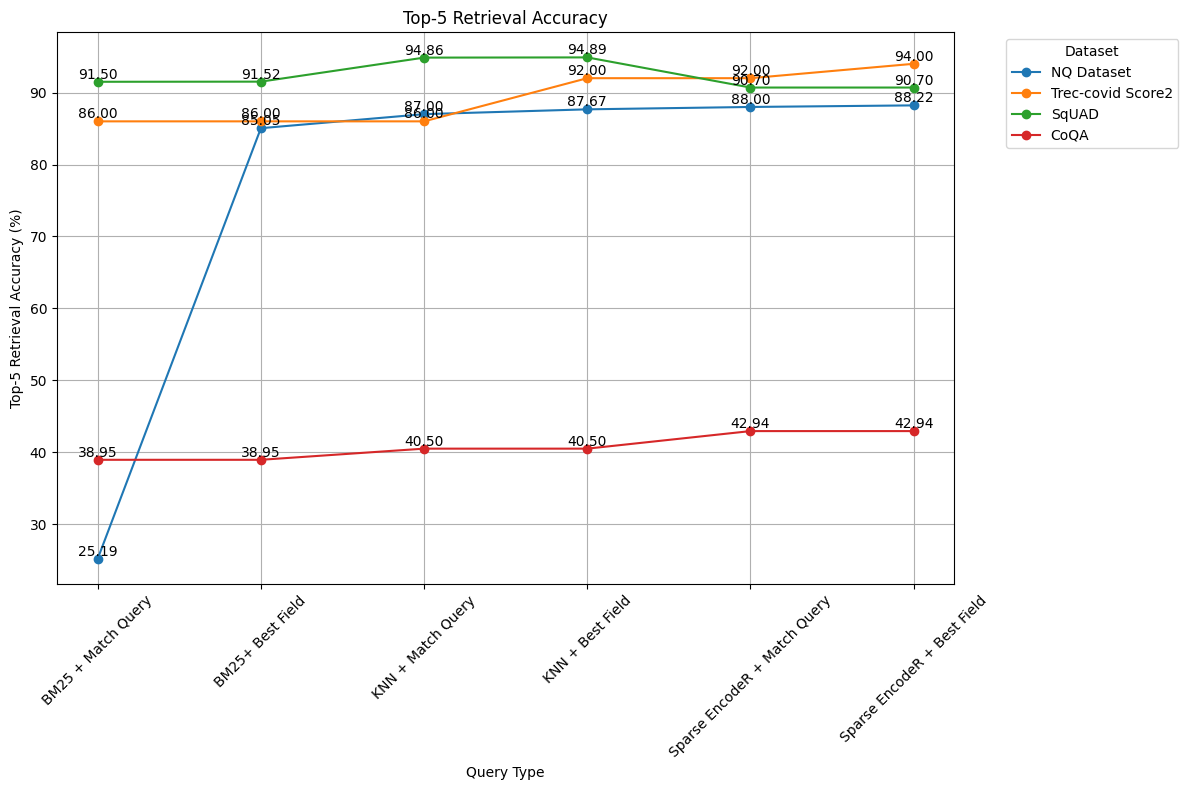

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Note: Replace 'file_path' with the actual path of your Excel file.
file_path = 'Top-k-retrieval-accuracy.xlsx'
# Reading the specific sheet. If it has a specific name, replace "Top-5" with the actual name.
df = pd.read_excel(file_path, sheet_name="Top-5")

# Assuming the first row contains the Query Types and the first column contains the Datasets.
# Transpose the DataFrame to make columns represent Datasets and rows represent Query Types.
df_transposed = df.T  # Transpose the DataFrame
df_transposed.columns = df_transposed.iloc[0]  # Set the first row as column names
df_transposed = df_transposed.drop(df_transposed.index[0])  # Drop the first row as it's now redundant

# Plotting
plt.figure(figsize=(12, 8))
# Assuming the datasets are now columns and the index of df_transposed are the Query Types.
for column in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[column], '-o', label=column)

    # Annotating each point with its value
    for idx, val in enumerate(df_transposed[column]):
        plt.text(df_transposed.index[idx], val, f'{val:.2f}', ha='center', va='bottom')

plt.title('Top-5 Retrieval Accuracy')
plt.xlabel('Query Type')
plt.ylabel('Top-5 Retrieval Accuracy (%)')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


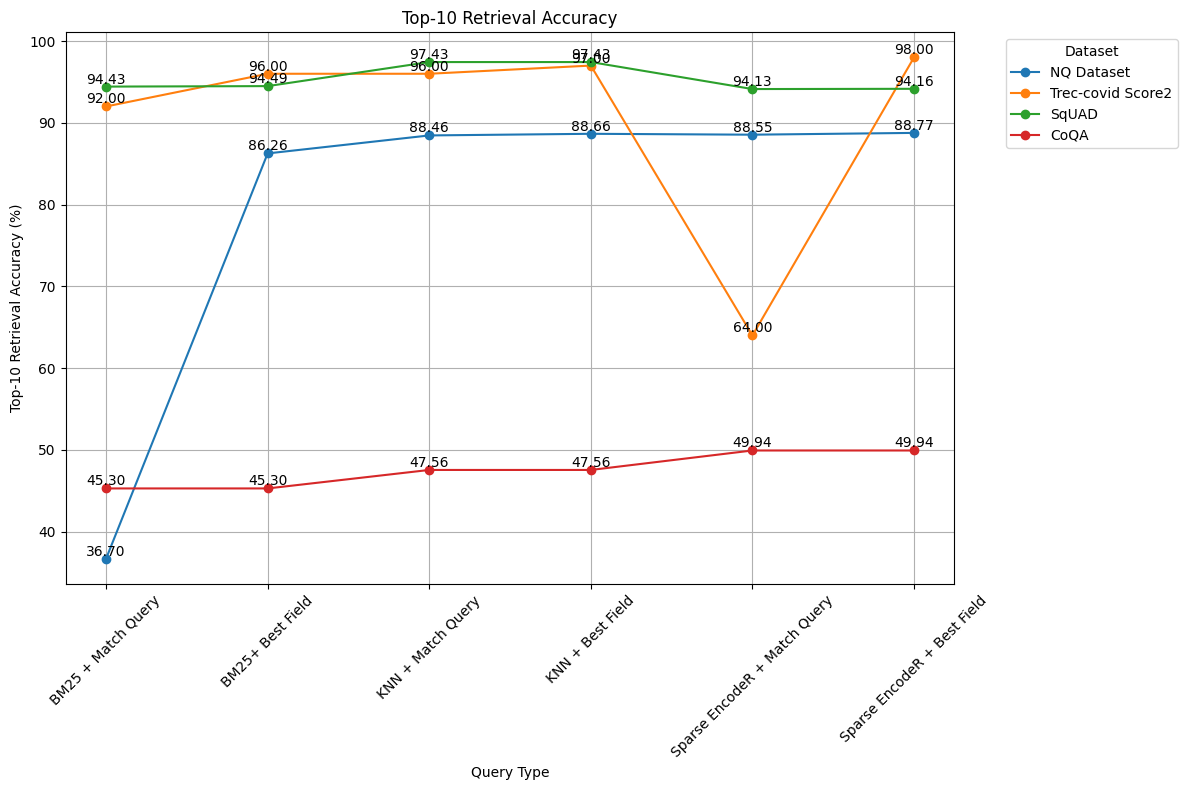

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Note: Replace 'file_path' with the actual path of your Excel file.
file_path = 'Top-k-retrieval-accuracy.xlsx'
# Reading the specific sheet. If it has a specific name, replace "Top-5" with the actual name.
df = pd.read_excel(file_path, sheet_name="Top-10")

# Assuming the first row contains the Query Types and the first column contains the Datasets.
# Transpose the DataFrame to make columns represent Datasets and rows represent Query Types.
df_transposed = df.T  # Transpose the DataFrame
df_transposed.columns = df_transposed.iloc[0]  # Set the first row as column names
df_transposed = df_transposed.drop(df_transposed.index[0])  # Drop the first row as it's now redundant

# Plotting
plt.figure(figsize=(12, 8))
# Assuming the datasets are now columns and the index of df_transposed are the Query Types.
for column in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[column], '-o', label=column)

    # Annotating each point with its value
    for idx, val in enumerate(df_transposed[column]):
        plt.text(df_transposed.index[idx], val, f'{val:.2f}', ha='center', va='bottom')

plt.title('Top-10 Retrieval Accuracy')
plt.xlabel('Query Type')
plt.ylabel('Top-10 Retrieval Accuracy (%)')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


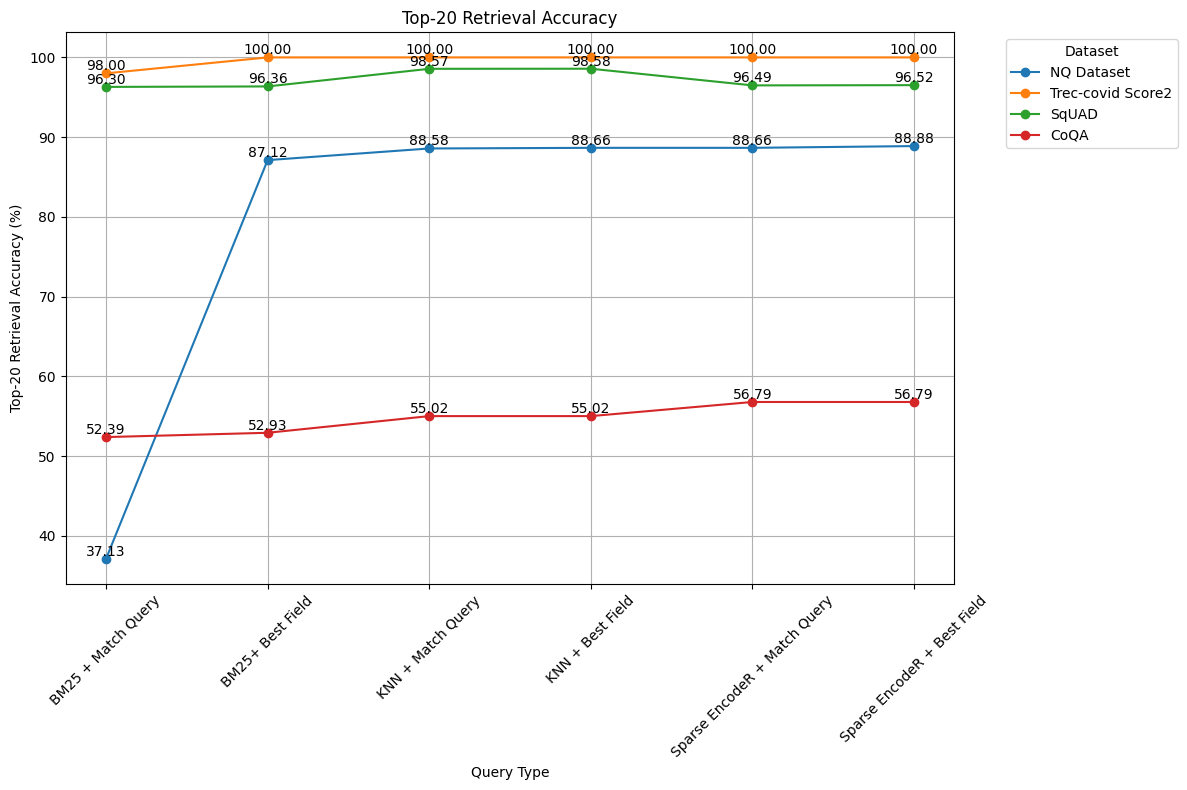

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Note: Replace 'file_path' with the actual path of your Excel file.
file_path = 'Top-k-retrieval-accuracy.xlsx'
# Reading the specific sheet. If it has a specific name, replace "Top-5" with the actual name.
df = pd.read_excel(file_path, sheet_name="Top-20")

# Assuming the first row contains the Query Types and the first column contains the Datasets.
# Transpose the DataFrame to make columns represent Datasets and rows represent Query Types.
df_transposed = df.T  # Transpose the DataFrame
df_transposed.columns = df_transposed.iloc[0]  # Set the first row as column names
df_transposed = df_transposed.drop(df_transposed.index[0])  # Drop the first row as it's now redundant

# Plotting
plt.figure(figsize=(12, 8))
# Assuming the datasets are now columns and the index of df_transposed are the Query Types.
for column in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[column], '-o', label=column)

    # Annotating each point with its value
    for idx, val in enumerate(df_transposed[column]):
        plt.text(df_transposed.index[idx], val, f'{val:.2f}', ha='center', va='bottom')

plt.title('Top-20 Retrieval Accuracy')
plt.xlabel('Query Type')
plt.ylabel('Top-20 Retrieval Accuracy (%)')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
